# Graph measures

This script showcases how to use some graph measures included in the comet toolbox.


In [1]:
import numpy as np
from nilearn import datasets
from matplotlib import pyplot as plt
from comet import graph

# Get preprocessed time series data from the ABIDE dataset
subjects = [50008, 50010, 50012, 50014]
data = datasets.fetch_abide_pcp(SUB_ID=subjects, pipeline='cpac', band_pass_filtering=True, derivatives="rois_dosenbach160")

[fetch_abide_pcp] Dataset found in /home/mibur/nilearn_data/ABIDE_pcp

Calculate and plot static functional connectivity:

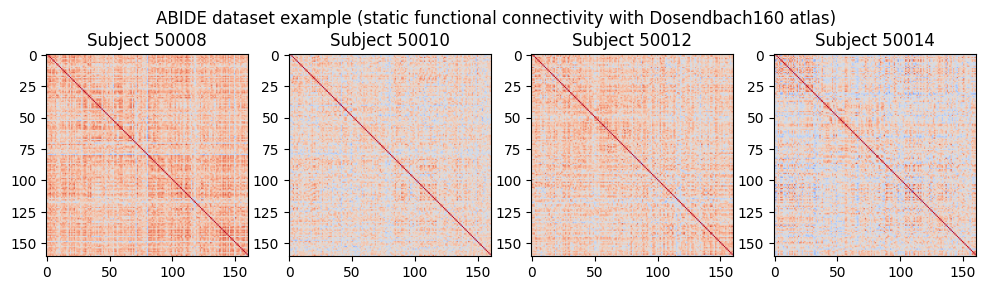

In [2]:
fig, ax = plt.subplots(1,4, figsize=(12,3))
fig.suptitle('ABIDE dataset example (static functional connectivity with Dosendbach160 atlas)')

fc = []
for sub in range(len(subjects)):
    ts = data.rois_dosenbach160[sub]
    corr = np.corrcoef(ts.T)
    fc.append(corr)
    ax[sub].imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
    ax[sub].set_title('Subject %d' % subjects[sub])

Graph construction and plotting of the resulting adjacency matrices:

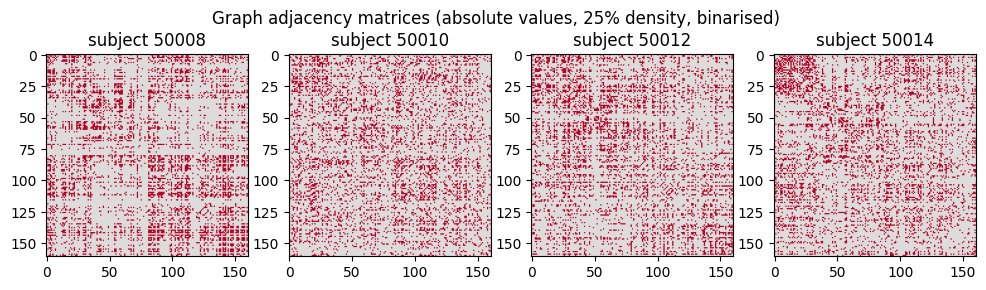

In [3]:
fig, ax = plt.subplots(1,4, figsize=(12,3))
fig.suptitle('Graph adjacency matrices (absolute values, 25% density, binarised)')

G = []
for i, sub in enumerate(subjects):
    g = graph.handle_negative_weights(fc[i], type="absolute")
    g = graph.threshold(g, type="density", density=0.2)
    g = graph.binarise(g)
    ax[i].imshow(g, cmap='coolwarm', vmin=-1, vmax=1)
    ax[i].set_title(f"subject {sub}")
    G.append(g)

Calculate small-world sigma:

In [4]:
for i, sub in enumerate(subjects):
    swp1 = graph.small_world_propensity(G[i])[0]
    print(f"Subject {sub} small-world propensity: {swp1:.2f}")

/home/mibur/comet/src/comet/graph.py:473: UserWarning: The graph is not fully connected; infinite path lengths were set to NaN.
  warnings.warn("The graph is not fully connected; infinite path lengths were set to NaN.")


Subject 50008 small-world propensity: 0.72
Subject 50010 small-world propensity: 0.52
Subject 50012 small-world propensity: 0.65
Subject 50014 small-world propensity: 0.59


Calculate local efficiency:

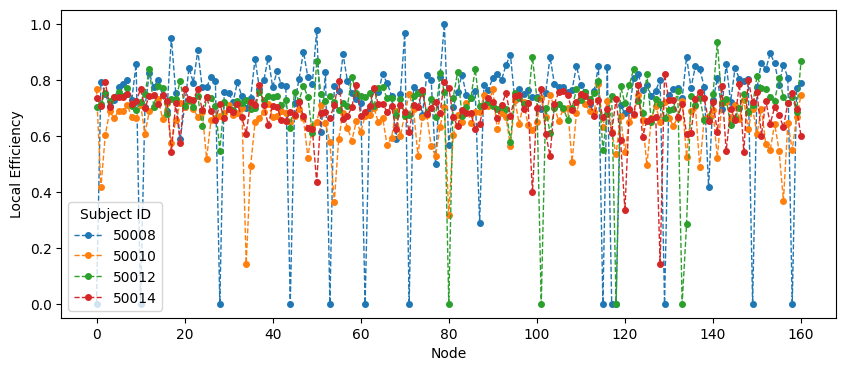

In [5]:
eff = []
for i, sub in enumerate(subjects):
    eff.append(graph.efficiency(G[i], local=True))

eff = np.asarray(eff).T

plt.figure(figsize=(10,4))
plt.plot(eff, label=subjects, marker='o', markersize=4, linestyle='--', linewidth=1)
plt.xlabel('Node')
plt.ylabel('Local Efficiency')
plt.legend(title="Subject ID");